In [1]:
import pandas as pd
import numpy as np

In [2]:
lcn = pd.read_csv('LungCapData.csv')

In [3]:
lcn.head(5)

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [4]:
lcn.shape

(725, 6)

In [5]:
# Data pre-processing/ data cleaning

In [6]:
lcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [7]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [8]:
lcn.Smoke.value_counts()

Smoke
no     648
yes     77
Name: count, dtype: int64

In [9]:
lcn.Smoke = lcn.Smoke.replace({'no':0,'yes':1})

In [10]:
lcn.Smoke.value_counts()

Smoke
0    648
1     77
Name: count, dtype: int64

In [11]:
lcn.Gender = lcn.Gender.replace({'female':0,'male':1})

In [12]:
lcn.Caesarean = lcn.Caesarean.replace({'no':0,'yes':1})

In [13]:
lcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    int64  
 4   Gender     725 non-null    int64  
 5   Caesarean  725 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 34.1 KB


In [14]:
# Sampling

In [15]:
from sklearn.model_selection import train_test_split

In [210]:
lcn = df1

In [211]:
lcn_train, lcn_test = train_test_split(lcn, test_size = 0.2)

In [212]:
lcn_train.shape

(509, 6)

In [213]:
725 * 80 / 100

580.0

In [214]:
lcn_test.shape

(128, 6)

In [215]:
725 * 20 / 100

145.0

In [216]:
lcn_train_y = lcn_train.iloc[:,0]
lcn_test_y = lcn_test.iloc[:,0]

In [217]:
lcn_train_x = lcn_train.iloc[:,1::]
lcn_test_x = lcn_test.iloc[:,1::]

In [218]:
lcn_train_x.head()

,Age,Height,Smoke,Gender,Caesarean
512,18,76.3,1,0,0
480,16,63.4,0,0,1
682,11,60.0,0,1,1
247,11,60.7,0,1,1
119,17,76.9,1,1,0


In [219]:
lcn_train_y.head()

512    11.500
480     5.675
682     5.825
247     7.475
119    11.775
Name: LungCap, dtype: float64

In [220]:
lcn_test_x.head()

,Age,Height,Smoke,Gender,Caesarean
534,8,61.3,0,1,1
502,18,71.5,0,0,0
431,12,61.8,0,1,0
32,13,69.3,0,1,0
312,14,67.5,0,0,0


In [221]:
lcn_test_y.head()

534     6.075
502    10.600
431     5.500
32     10.600
312     8.775
Name: LungCap, dtype: float64

In [222]:
#Build Model

In [223]:
from sklearn.linear_model import LinearRegression

In [224]:
linereg = LinearRegression()

In [225]:
linereg.fit(lcn_train_x, lcn_train_y)

LinearRegression()

In [226]:
#Evaluating model

In [227]:
Rsquare = linereg.score(lcn_train_x, lcn_train_y)
Rsquare

0.7818276070185611

In [228]:
N = lcn_train_x.shape[0]
K = lcn_train_x.shape[1]

In [229]:
adj_Rsquare = 1 - (1-Rsquare)*(N-1)/(N-K-1)
adj_Rsquare

0.7796588953587059

In [230]:
linereg.coef_

array([ 0.13525003,  0.23842791, -0.45717898,  0.35089409, -0.19540596])

In [231]:
lcn_train_x

,Age,Height,Smoke,Gender,Caesarean
512,18,76.3,1,0,0
480,16,63.4,0,0,1
682,11,60.0,0,1,1
247,11,60.7,0,1,1
119,17,76.9,1,1,0
...,...,...,...,...,...
297,13,66.6,0,0,1
381,9,59.9,0,0,0
170,15,68.9,0,1,0
183,16,75.4,0,1,0


In [232]:
linereg.intercept_

-9.303984562431653

In [233]:
pred_train = linereg.predict(lcn_train_x)

In [234]:
pred_test = linereg.predict(lcn_test_x)

In [235]:
pred_train

array([10.86538618,  7.78093916,  6.64492822,  6.81182775, 11.22408698,
        7.21715519,  5.28970748,  5.59122076,  4.94029499, 10.68661653,
       12.46027134,  8.45383722,  7.21609625,  8.83782866,  8.84249229,
        9.80549223,  7.15809717,  6.21113331,  6.40187564,  9.04460706,
        8.62324354,  7.65035277,  8.03141476,  8.08838865,  4.54952203,
        9.57444838,  8.17510779, 10.44500659,  9.39401955,  8.13190827,
        9.89305668,  9.08978585, 10.08638081,  4.89935718,  9.55459397,
        6.60865404,  6.41074129,  7.11758201, 10.75878119,  9.2876986 ,
        8.07129363,  8.15062871, 10.88516557,  7.74992595,  8.8388876 ,
        5.45597073,  9.14934155,  7.37310494, 10.94994617, 10.57626823,
        7.10154593,  5.90898375,  4.04059406,  9.0140165 ,  7.83692913,
        7.02599021,  5.74989093,  5.30150258,  5.2652284 ,  5.7342775 ,
        9.11362864, 10.95817554,  9.48730658,  9.06127943,  6.76816952,
        7.14248374,  8.0324737 ,  4.0654958 ,  8.9072729 ,  7.91

In [236]:
pred_test

array([ 6.5491344 , 10.17811122,  7.40475444,  9.32821376,  8.68339947,
        8.44959624,  8.17489416,  9.2011931 ,  7.9562817 , 10.71558167,
        9.02076427, 11.92283694,  9.56289836,  9.66095388,  9.9086701 ,
       11.21221687, 10.49545155,  9.69366233,  9.57063005,  5.80538322,
        8.55637881,  9.35880432,  8.19093024, 10.56846152,  6.93528268,
       11.91082821,  5.01076442,  6.0281977 ,  7.15851982, 10.87061109,
        8.09153173,  6.56142717,  6.03600441,  7.95207968,  9.84431215,
        8.3179509 , 11.17950842,  9.23220631,  5.53636476,  7.74530127,
        9.82046936,  6.37803285, 10.54461873,  8.32109398,  4.03698937,
        7.69387239,  6.84333864,  9.01045077, 10.48390153,  7.99259483,
        6.77597623,  7.98415184,  6.44998388,  8.19873695,  7.87232194,
        9.98320293,  4.38618823,  9.96458505,  5.82247824,  8.6397773 ,
       11.14383157, 10.08588313,  8.08838865,  6.61646075,  7.79718887,
       10.71932498, 11.3143358 ,  8.07192992, 10.46528365, 10.47

In [237]:
err_train = lcn_train_y - pred_train
err_train

512    0.634614
480   -2.105939
682   -0.819928
247    0.663172
119    0.550913
         ...   
297    0.586842
381    1.179903
170   -0.653343
183   -1.263374
602   -0.778846
Name: LungCap, Length: 509, dtype: float64

In [238]:
err_test = lcn_test_y - pred_test
err_test

534   -0.474134
502    0.421889
431   -1.904754
32     1.271786
312    0.091601
         ...   
39    -0.547008
167   -0.780087
59    -0.242689
456   -0.690103
599   -1.233355
Name: LungCap, Length: 128, dtype: float64

In [239]:
mse = np.mean(np.square(err_test))
mse

0.7723800269493761

In [240]:
rmse = np.sqrt(mse)
rmse

0.8788515386283261

In [241]:
mape = np.mean(np.abs(err_test*100 / lcn_test_y))
mape

8.988632609387448

In [242]:
import matplotlib.pyplot as plt

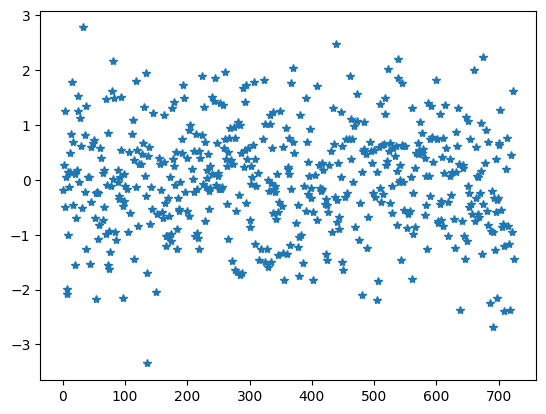

In [243]:
plt.plot(err_train,'*')

(array([ 1.,  0.,  1.,  8.,  7., 14., 26., 32., 45., 56., 61., 68., 64.,
        44., 26., 28., 16.,  7.,  4.,  1.]),
 array([-3.34629363, -3.04026018, -2.73422672, -2.42819327, -2.12215981,
        -1.81612636, -1.51009291, -1.20405945, -0.898026  , -0.59199254,
        -0.28595909,  0.02007436,  0.32610782,  0.63214127,  0.93817473,
         1.24420818,  1.55024163,  1.85627509,  2.16230854,  2.468342  ,
         2.77437545]),
 <BarContainer object of 20 artists>)

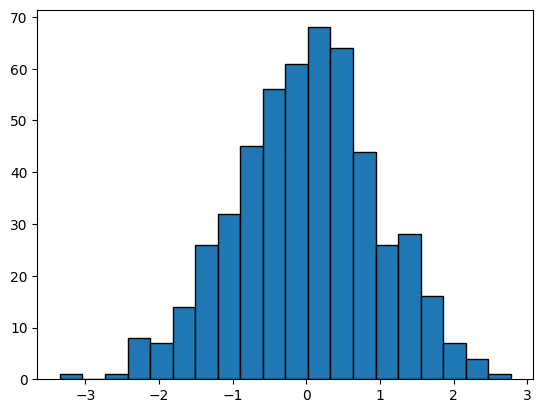

In [244]:
plt.hist(err_train, bins=20, edgecolor='k')

In [245]:
import seaborn as sns

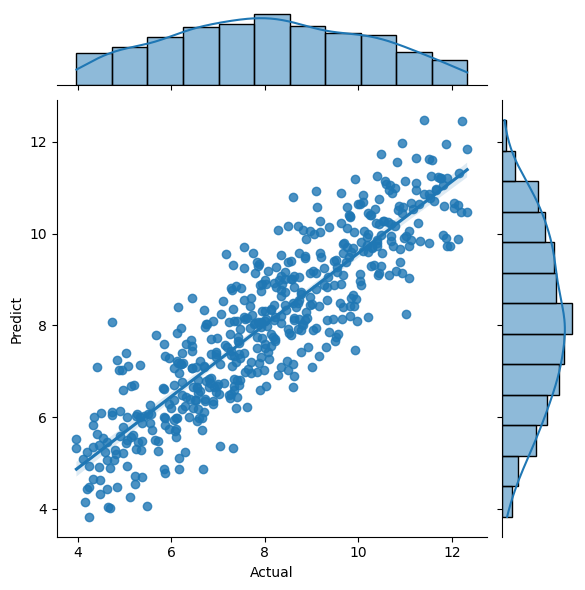

In [246]:
DataFrame = pd.DataFrame()
DataFrame['Actual'] = lcn_train_y
DataFrame['Predict'] = pred_train
sns.jointplot(x='Actual', y='Predict',data=DataFrame, kind='reg')

In [247]:
def remove_outliers(df,col,k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x>mean - k*sd)]
    final_list = [x for x in final_list if (x<mean + k*sd)]
    df1 = df.loc[df[col].isin(final_list)]; print(df1.shape)
    print('Number of outliers removed -- >', df.shape[0] - df1.shape[0])

In [248]:
remove_outliers(lcn,'LungCap',2)

(632, 6)
Number of outliers removed -- > 5
